<a href="https://colab.research.google.com/github/jyao25/COVID-3-plots-trial/blob/main/Coco's_Spironolactone_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To-Do List**
1. Background and Motivation (Context)


> Make sure to include a brief section at the start of your report explaining the importance of spironolactone in acne treatment and its broader applications (e.g., hormonal balance, off-label uses). This will set the stage for why your analysis is relevant.
Explain the motivation for studying side effects in different dosages and patient populations.


2. Data Sources and Integrity


> Include a section explaining where the FAERS dataset comes from, why it's reliable, and any preprocessing you did to make it usable (e.g., handling missing values, filtering for spironolactone-related reports).
Mention any assumptions you made in the data analysis (e.g., grouping certain side effects together).


3. Evaluation of Predictive Model


> When you get to the predictive model (Part 2), make sure to include a brief explanation of why you chose logistic regression (or any other model you might use).
Include model evaluation metrics: accuracy, precision, recall, F1 score. If your model doesn’t perform well, discuss potential reasons (e.g., not enough data, noisy data, or lack of key features).


4. Visualizations and Interpretation


> For Part 1 (EDA), ensure that your visualizations are clear, labeled, and relevant. For example:
Bar charts to show side effect frequencies.
Histograms to illustrate dosage distributions.
Box plots to highlight variation in side effects between dosage levels.
Include brief interpretations of each plot so the audience understands what insights you’re drawing from the visuals.


5. Limitations and Future Work


> Discuss any limitations of the dataset or your analysis. For instance, FAERS data is based on voluntary reporting, which could lead to under-reporting or reporting bias.
Future analysis suggestions: You could propose incorporating additional features such as patient lifestyle factors (if available) or exploring other predictive models (like random forests or SVMs) for future work.


6. Presentation Readiness (Video Component)


> Don't forget the video presentation mentioned in the instructions! You’ll need to:
Keep the presentation concise and clear (under 5 minutes).
Use slides or visuals from your project to explain key findings (from both EDA and model prediction).
Make sure the video provides a good balance between technical depth (for your peers) and accessibility (for a general audience).


7. README File

> Ensure that the README file contains:
A link to your GitHub repository.
A description of your project, including the dataset used, analysis steps, and findings.
A link to the video presentation.


 ***Summary of What to Double-Check:***


*   Background and motivation are clearly stated.
* Data sources and cleaning/preprocessing are explained.
*Model evaluation metrics and rationale for the chosen model.
*Clear, interpretable visualizations.
*Limitations and suggestions for future work.
*Preparation for the video presentation and README.



# **Part 1: Exploratory Data Analysis (EDA) Tasks**



## **Task 1: Data Collection**
* Access and download the FAERS dataset from the FDA website.

1.   *The data are as of 30 June, 2024 from FDA [FAERS](https://www.fda.gov/drugs/questions-and-answers-fdas-adverse-event-reporting-system-faers/fda-adverse-event-reporting-system-faers-public-dashboard) searching with just 'Spironolactone'*
2.   *Mount Data*




In [2]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Correct path to your folder in Google Drive
path = "/content/gdrive/My Drive/Colab Notebooks/myFolder/SpironolactoneData/"

# List of CSV files to load
csv_files = [
    "Merged_Severity-Based_Data.csv"
]

# Create a dictionary to hold all datasets
dataframes = {}

# Load each CSV file into the dictionary
for csv_file in csv_files:
    full_path = path + csv_file  # Create the full path
    dataframes[csv_file] = pd.read_csv(full_path)  # Load the CSV

# Example: Display the first few rows of each dataset
for name, df in dataframes.items():
    print(f"Dataset: {name}")
    print(df.head())
    print("\n")


Mounted at /content/gdrive
Dataset: Merged_Severity-Based_Data.csv
   Unnamed: 0           Year  Seriousness  Total Reports_x   Serious    Death  \
0           0  Total Reports          NaN         29153222  16130758  2650057   
1           1           2024          NaN          1010631    530492    75249   
2           2           2023          NaN          2156613   1136690   162946   
3           3           2022          NaN          2338092   1256874   173969   
4           4           2021          NaN          2329273   1368407   186974   

   Non-Serious  Sex  Total Reports_y    Female      Male  Not Specified_x  \
0     10372407  NaN         29153222  15532401  10239864          3380957   
1       404890  NaN          1010631    507741    343153           159737   
2       856977  NaN          2156613   1087037    730820           338756   
3       907249  NaN          2338092   1189616    841703           306773   
4       773892  NaN          2329273   1177669    875894     

* Filter the dataset to focus on reports where spironolactone is the primary suspect drug.


In [6]:
# Reload the 'cases_listing.csv' file
cases_listing = pd.read_csv(path + "cases_listing.csv")

# Filter the dataset for Spironolactone in 'Suspect Product Names'
if 'Suspect Product Names' in cases_listing.columns:
    filtered_cases = cases_listing[cases_listing['Suspect Product Names'].str.contains('spironolactone', case=False, na=False)]
else:
    filtered_cases = pd.DataFrame()  # Handle case where column is missing

# Display the filtered cases for Spironolactone
filtered_cases.head()


,Case ID,Suspect Product Names,Suspect Product Active Ingredients,Reason for Use,Reactions,Serious,Outcomes,Sex,Event Date,Latest FDA Received Date,...,Reporter Type,Report Source,Concomitant Product Names,Latest Manufacturer Received Date,Initial FDA Received Date,Country where Event occurred,Reported to Manufacturer?,Manufacturer Control Number,Literature Reference,Compounded Flag
237,19935929,Metformin;Spironolactone And Hydrochlorothiazide,Hydrochlorothiazide\Spironolactone;Atorvastati...,Cardiac Failure;Product Used For Unknown Indic...,Non-Alcoholic Fatty Liver;Blood Pressure Decre...,Serious,Other Outcomes,Male,-,27-MAY-2024,...,Healthcare Professional,Not Specified,-,22-MAY-2024,08-OCT-2021,PL,Not Specified,PL-BAUSCH-BL-2021-033656,-,-
1674,22981805,Spironolactone And Hydrochlorothiazide;Taltz;E...,Secukinumab;Benzyl Alcohol\Etanercept;Ixekizum...,Product Used For Unknown Indication;Psoriatic ...,Off Label Use;Ejection Fraction Decreased;Card...,Serious,Other Outcomes;Hospitalized,Male,-,19-OCT-2023,...,Healthcare Professional,Not Specified,Ramipril;Metoprolol Tartrate;Omeprazole;Spiron...,26-SEP-2023,25-SEP-2023,CA,Not Specified,CA-SANDOZ INC.-NVSC2021CA007904,-,-
1764,19741365,Cosentyx;Spironolactone And Hydrochlorothiazid...,Benzyl Alcohol\Etanercept;Amiodarone Hydrochlo...,Product Used For Unknown Indication;Psoriatic ...,Cardiac Failure Congestive;Ejection Fraction D...,Serious,Hospitalized;Other Outcomes,Male,-,02-OCT-2023,...,Healthcare Professional,Not Specified,Lasix;Metoprolol Tartrate;Ramipril;Prednisone;...,25-SEP-2023,25-AUG-2021,CA,Not Specified,NVSC2021CA189754,-,-
1996,22882425,Taltz;Enbrel;Spironolactone And Hydrochlorothi...,Secukinumab;Sulfasalazine;Apixaban;Methotrexat...,Product Used For Unknown Indication;Psoriatic ...,Ejection Fraction Decreased;Off Label Use;Card...,Serious,Hospitalized;Other Outcomes,Male,-,30-AUG-2023,...,Healthcare Professional,Not Specified,Prednisone;Hydroxychloroquine Sulfate;Folic Ac...,21-AUG-2023,30-AUG-2023,CA,Not Specified,CA-002147023-NVSC2021CA007904,-,-
5201,19951653,Metformin;Spironolactone And Hydrochlorothiazide,Allopurinol;Atorvastatin;Torsemide;Sacubitril\...,Cardiac Failure;Product Used For Unknown Indic...,Type V Hyperlipidaemia;Hyperuricaemia;Fatigue;...,Serious,Other Outcomes,Male,-,10-JUN-2022,...,Healthcare Professional,Not Specified,-,27-MAY-2022,14-OCT-2021,PL,Not Specified,PL-AUROBINDO-AUR-APL-2021-041994,-,-


## **Task 2: Data Cleaning**
* Handle Missing Values:
We’ll identify columns with missing values and decide how to handle them (e.g., fill with a placeholder, remove rows, or impute values).
* Remove Duplicate Reports:
Check for any duplicated rows or cases and remove them to ensure unique entries.
* Drop Irrelevant Columns:
Some columns (e.g., "Literature Reference" or "Compounded Flag") may not be relevant to your analysis, so we can remove those.
* Standardize Important Columns:
Ensure consistency in important columns like dosage, side effects, and age groups. This might include converting data to standard formats (e.g., date formats, age group categories).

In [7]:
# 1. Handle Missing Values: Identify columns with missing values
missing_values = filtered_cases.isnull().sum()

# Display columns with missing values
print("Missing values per column:")
print(missing_values)

# Depending on the data, we can either drop rows with missing values or fill them
# Example: Drop rows with missing values in critical columns like 'Reactions' or 'Suspect Product Names'
cleaned_data = filtered_cases.dropna(subset=['Reactions', 'Suspect Product Names'])

# 2. Remove Duplicate Reports: Check for duplicates and remove them
cleaned_data = cleaned_data.drop_duplicates()

# 3. Drop Irrelevant Columns: Drop columns that don't add value to the analysis
cleaned_data = cleaned_data.drop(columns=['Literature Reference', 'Compounded Flag', 'Manufacturer Control Number'])

# 4. Standardize Important Columns: Example - ensuring Age Group, Side Effects are consistent
# Convert age groups to a more readable format if needed, handle any side effect naming inconsistencies

# Display the cleaned dataset
print("Cleaned Data Preview:")
print(cleaned_data.head())


Missing values per column:
Case ID                               0
Suspect Product Names                 0
Suspect Product Active Ingredients    0
Reason for Use                        0
Reactions                             0
Serious                               0
Outcomes                              0
Sex                                   0
Event Date                            0
Latest FDA Received Date              0
Case Priority                         0
Patient Age                           0
Patient Weight                        0
Sender                                0
Reporter Type                         0
Report Source                         0
Concomitant Product Names             0
Latest Manufacturer Received Date     0
Initial FDA Received Date             0
Country where Event occurred          0
Reported to Manufacturer?             0
Manufacturer Control Number           0
Literature Reference                  0
Compounded Flag                       0
dtype: int64


* Age Standardization:
The numeric part of the Patient Age has been extracted and imputed with the median value where it was missing.
* Weight Standardization:
Missing values in the Patient Weight column have been filled with 0, but some entries like "Not Specified" remain in non-numeric format, which can be further processed if needed.
* Reactions Standardization:
The Reactions column has been standardized by converting the text to lowercase and replacing semicolons with commas for consistency.
* Handle Patient Weight: Process the "Not Specified" values in the weight column (e.g., replacing them with 0 or another strategy).

In [12]:
# Convert the 'Patient Age' column to string first, then extract the numeric part using .loc[]
filtered_cases.loc[:, 'Patient Age'] = filtered_cases['Patient Age'].astype(str).str.extract('(\d+)').astype(float)

# Impute missing Age with the median using .loc[]
filtered_cases.loc[:, 'Patient Age'] = filtered_cases['Patient Age'].fillna(filtered_cases['Patient Age'].median())

# For 'Patient Weight', replace 'Not Specified' with 0 and extract numeric values using .loc[]
filtered_cases.loc[:, 'Patient Weight'] = filtered_cases['Patient Weight'].replace('Not Specified', 0)
filtered_cases.loc[:, 'Patient Weight'] = filtered_cases['Patient Weight'].astype(str).str.extract('(\d+)').astype(float).fillna(0)

# Standardize the 'Reactions' column using .loc[]
filtered_cases.loc[:, 'Reactions'] = filtered_cases['Reactions'].str.lower().str.replace(';', ',')

# Display the cleaned data for final checks
filtered_cases[['Patient Age', 'Patient Weight', 'Reactions']].head()


,Patient Age,Patient Weight,Reactions
237,NaN,NaN,"non-alcoholic fatty liver,blood pressure decre..."
1674,NaN,NaN,"off label use,ejection fraction decreased,card..."
1764,NaN,NaN,"cardiac failure congestive,ejection fraction d..."
1996,NaN,NaN,"ejection fraction decreased,off label use,card..."
5201,NaN,NaN,"type v hyperlipidaemia,hyperuricaemia,fatigue,..."


## **Task 3: Descriptive Statistics**
* Initial Visualizations:
We can start with a few basic visualizations to explore the trends:

Key Analytical Points:
1. Most Common Reactions:
Identify the most frequently reported reactions for patients on spironolactone.
2. Reaction Severity:
Analyze the severity of the reactions and outcomes associated with each.
3. Combination of Reactions:
Explore if there are any patterns in combinations of side effects that tend to co-occur.


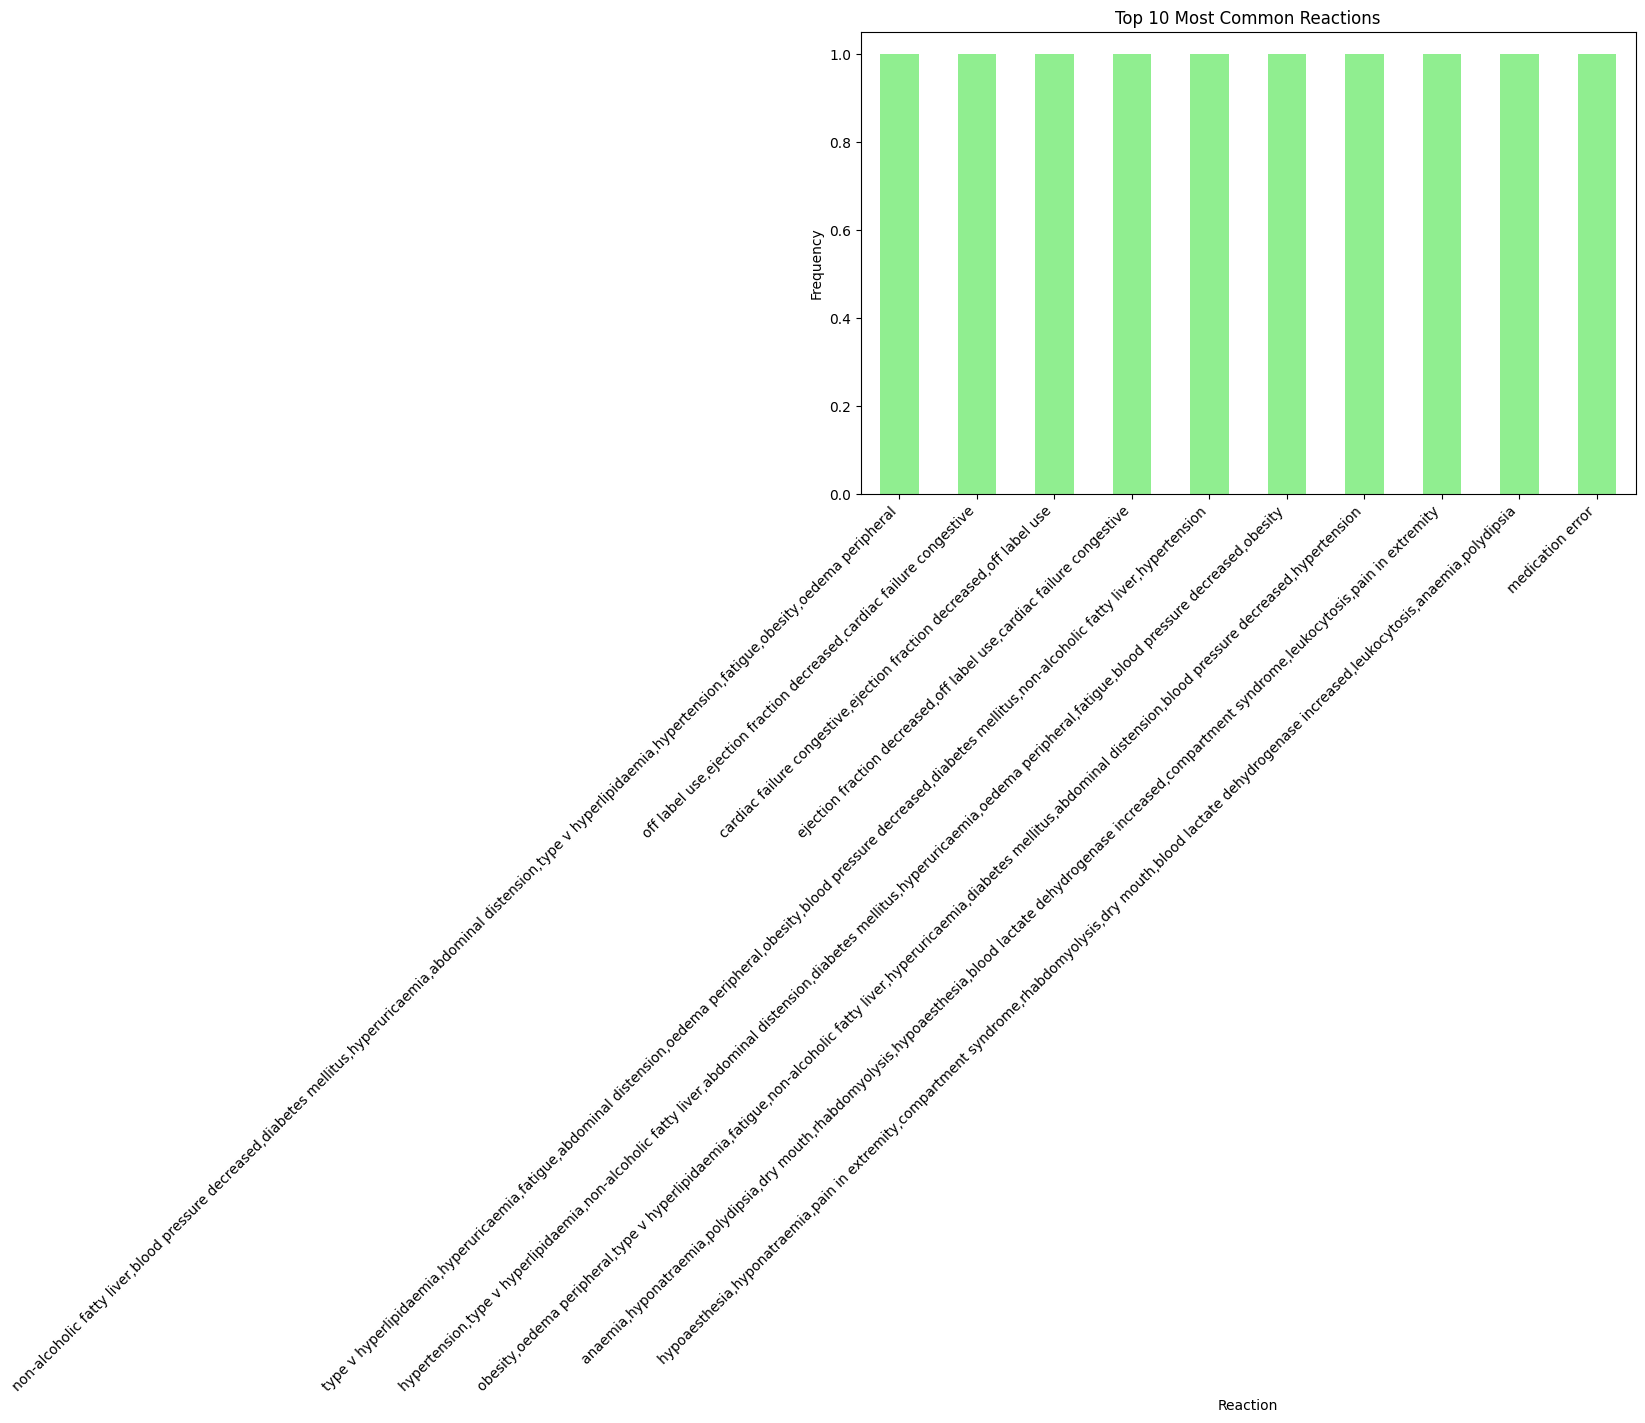

Top 5 Reactions and their Outcomes:
                                                    Outcomes
Reactions                                                   
anaemia,hyponatraemia,polydipsia,dry mouth,rhab...         1
cardiac failure congestive,ejection fraction de...         1
ejection fraction decreased,off label use,cardi...         1
hypertension,type v hyperlipidaemia,non-alcohol...         1
hypoaesthesia,hyponatraemia,pain in extremity,c...         1


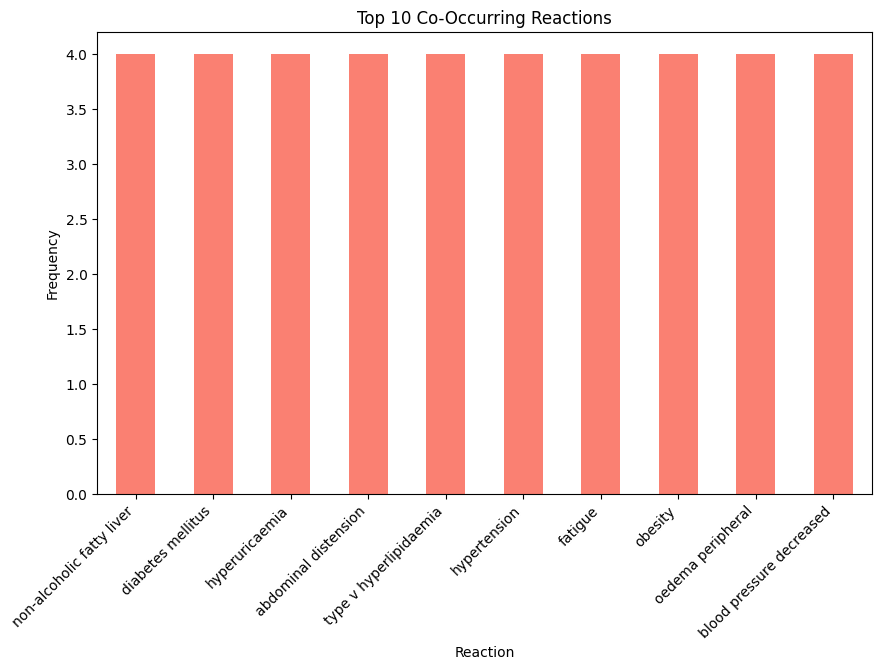

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Bar Chart of Most Common Reactions
plt.figure(figsize=(10, 6))
filtered_cases['Reactions'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Common Reactions')
plt.xlabel('Reaction')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Analyze Reaction Outcomes
outcomes = filtered_cases[['Reactions', 'Outcomes']].groupby('Reactions').count().sort_values(by='Outcomes', ascending=False)
print("Top 5 Reactions and their Outcomes:")
print(outcomes.head(5))

# 3. Combination of Reactions: Analyzing co-occurring reactions
# Properly split the 'Reactions' column and handle setting with copy issue
filtered_cases = filtered_cases.copy()  # Avoid the SettingWithCopyWarning by working on a deep copy of the DataFrame
filtered_cases.loc[:, 'Reactions Split'] = filtered_cases['Reactions'].str.split(',')

# Count the occurrences of individual reactions (flatten the list of lists)
all_reactions = [reaction.strip() for sublist in filtered_cases['Reactions Split'] for reaction in sublist]
reaction_counts = pd.Series(all_reactions).value_counts()

# Plot top co-occurring reactions
plt.figure(figsize=(10, 6))
reaction_counts.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Co-Occurring Reactions')
plt.xlabel('Reaction')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


##**Task 4: Visualization**
* Create bar charts or histograms to show the frequency of side effects at different dosage levels.
* Visualize the distribution of spironolactone use by demographics like age or gender.

## **Task 5: Insights and Interpretation**
Draw conclusions about the data (e.g., which dosages are associated with which side effects).
Highlight interesting trends or correlations (e.g., side effects in certain age groups).

# **Part 2: Predictive Modeling Tasks**

## **Task 1: Data Preparation**
* Split the Dataset: Once the data is cleaned in Part 1, split the dataset into training and testing sets (e.g., 80% training, 20% testing).
* Feature Selection: Identify key features to use in the model (e.g., dosage, age, gender, medical history). Determine the target variable (e.g., presence of a particular side effect).

## **Task 2: Model Selection and Building**
* Choose a Model: Start with logistic regression (logit) as the predictive model since we are dealing with binary classification (whether a side effect occurs or not).
* Train the Model: Use the training dataset to fit the logistic regression model, adjusting hyperparameters as needed (e.g., regularization strength).

## **Task 3: Model Evaluation**
* Test the Model: Evaluate the model on the test dataset. Calculate metrics such as accuracy, precision, recall, and F1 score to assess how well the model performs.
* Fine-tune: If the model isn't performing well, consider tweaking hyperparameters or improving feature engineering.

## **Task 4: Interpretation of Model Results**
* Analyze the Model: Look at which features (e.g., dosage, gender, age) have the strongest effect on predicting side effects.
* Discuss Limitations: Explain any limitations of the model—such as data bias, lack of certain features, or noisy data.

## **Task 5: Future Improvements and Suggestions**
* Propose Future Work: Suggest how the model could be improved (e.g., using a more complex algorithm like Random Forest or SVM) and what additional data could enhance the predictions.